## Linear Regression Model that predicts how much a person will spend yearly on an e-commerce website


*using the kaggle e-commerce dataset*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r"D:\ecom.csv")

## Quick overview of the data

In [4]:
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [5]:
df.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
ndf=df[['Avg. Session Length','Time on App','Time on Website','Length of Membership','Yearly Amount Spent']]
ndf

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573,573.847438
496,34.702529,11.695736,37.190268,3.576526,529.049004
497,32.646777,11.499409,38.332576,4.958264,551.620145
498,33.322501,12.391423,36.840086,2.336485,456.469510


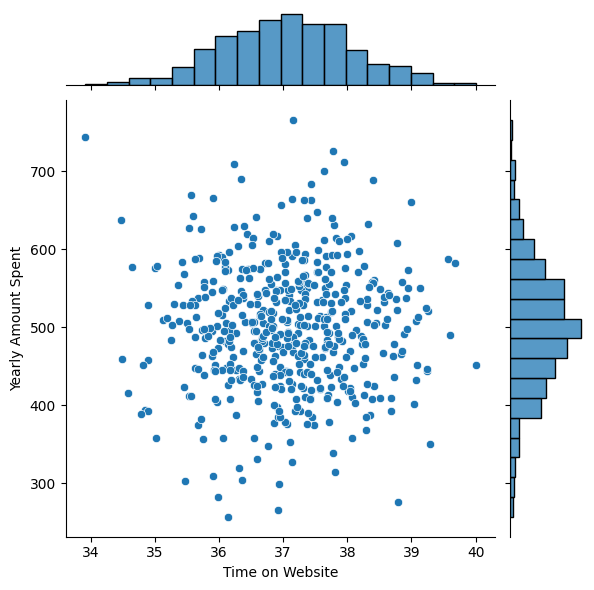

In [9]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent',data=ndf)

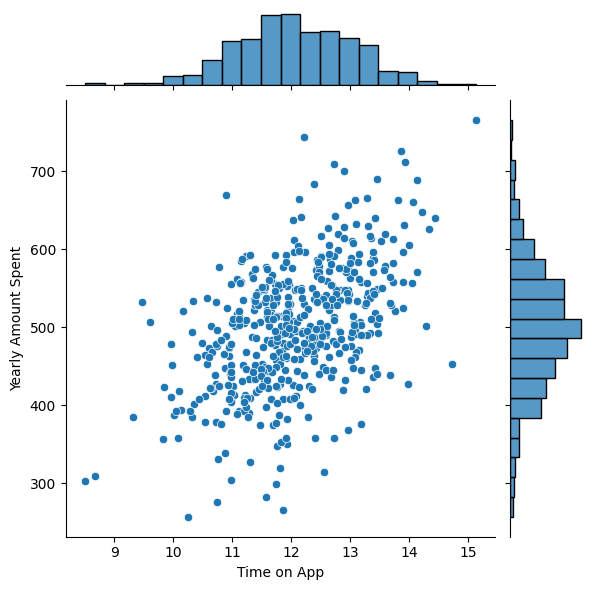

In [10]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent',data=ndf)
# there seems to be more correlation here

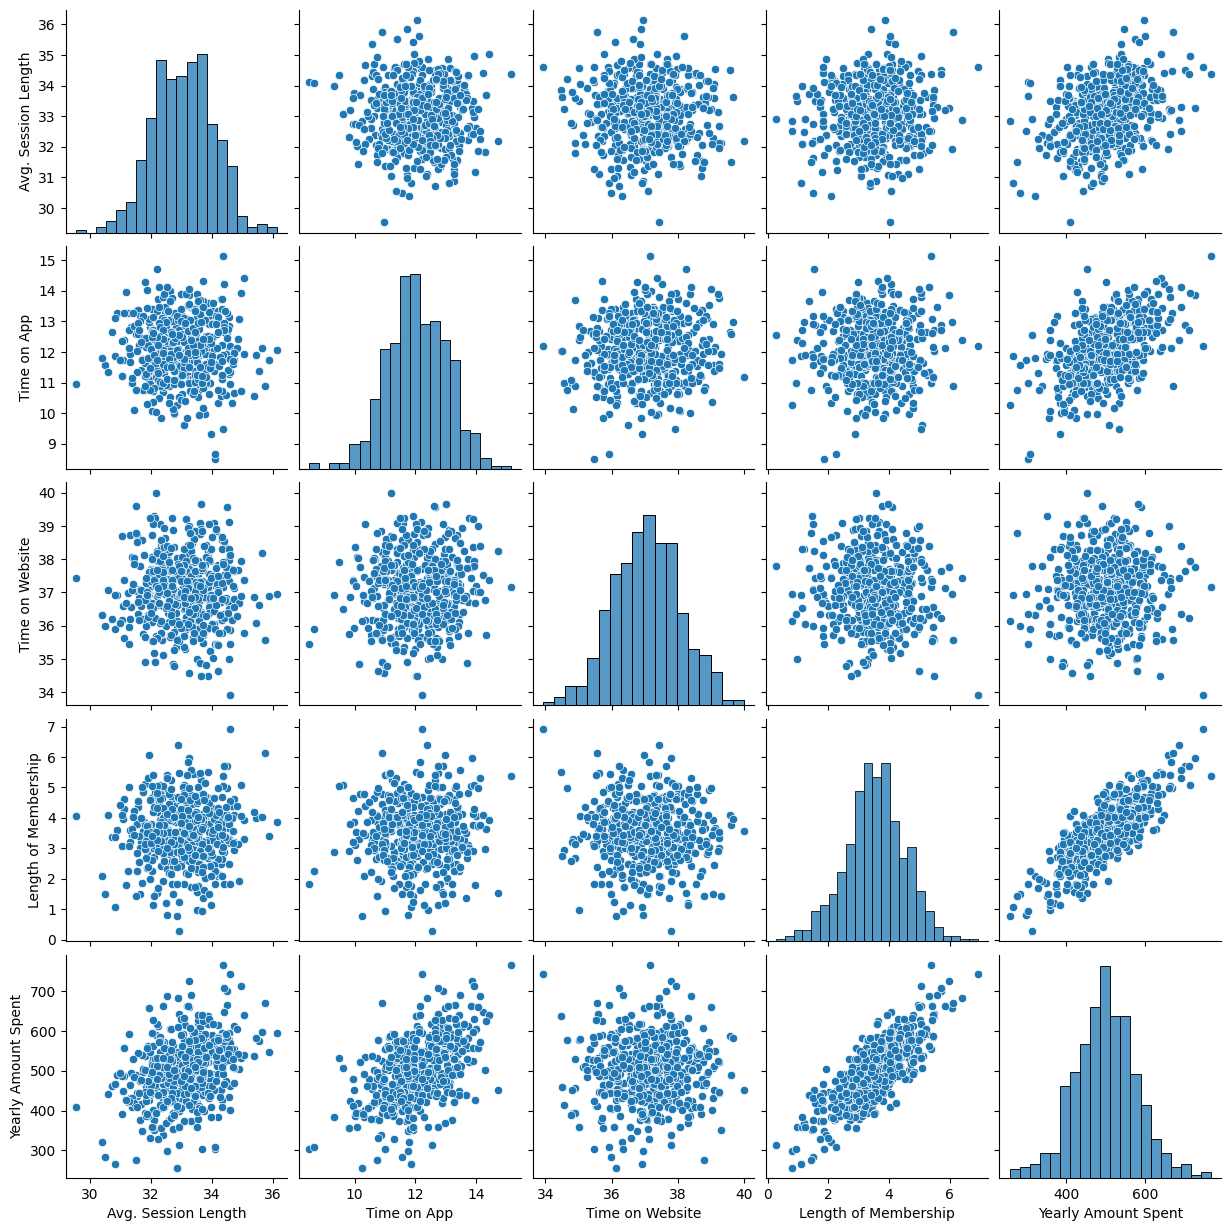

In [11]:
sns.pairplot(ndf, kind='scatter')

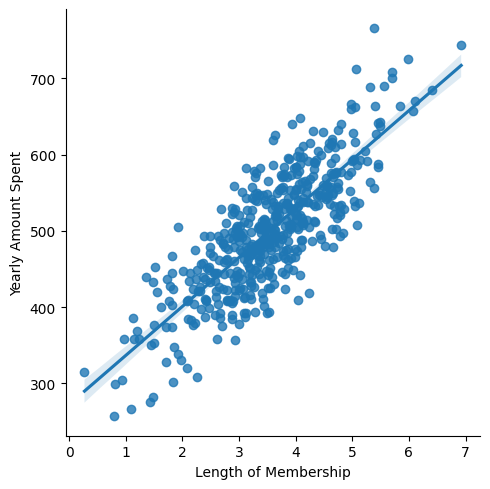

In [12]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=ndf)

# Linear Model

In [14]:
#splitting the data 
from sklearn.model_selection import train_test_split
x=ndf.drop('Yearly Amount Spent', axis=1)
y= ndf['Yearly Amount Spent']
x_train, x_test, y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)


In [15]:
  # training the model
from sklearn.linear_model import LinearRegression

In [18]:
model=LinearRegression()
model.fit(x_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
model.coef_

array([25.72425621, 38.59713548,  0.45914788, 61.67473243])

In [22]:
#predictions
y_pred=model.predict(x_test)


<function matplotlib.pyplot.ylabel(ylabel: 'str', fontdict: 'dict[str, Any] | None' = None, labelpad: 'float | None' = None, *, loc: "Literal['bottom', 'center', 'top'] | None" = None, **kwargs) -> 'Text'>

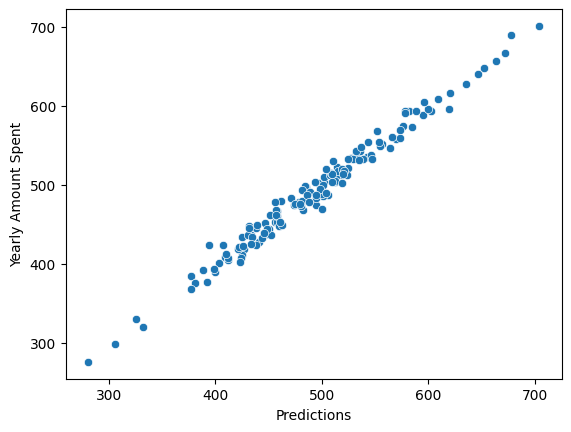

In [24]:
sns.scatterplot(x=y_pred,y=y_test)
plt.xlabel('Predictions')
plt.ylabel

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
print(f"Mean squared error: {mean_squared_error(y_test,y_pred)}")
print(f"Mean absolute error: {mean_absolute_error(y_test,y_pred)}")
print(f"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred))}")
print(f"R^2 score: {r2_score(y_test,y_pred)}")

Mean squared error: 103.91554136503295
Mean absolute error: 8.426091641432098
RMSE: 10.193897260863135
R^2 score: 0.9808757641125856


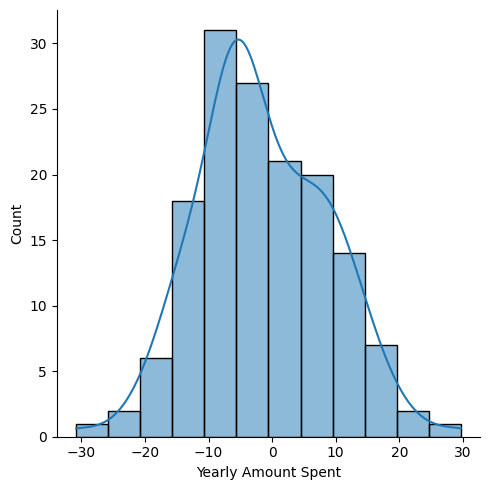

In [30]:
# calculating residuals
residuals=y_test-y_pred
sns.displot(residuals, kde=True)

In [ ]:
#the residuals are almost normally distributed which is what the linear model assumes